# Implementing Ant Colony Optimization (ACO) algorithm for a given Symmetric traveling salesman problem (TSP)

## Introduction
### Ant Colony Optimization (ACO)
It is an **optimization algorithm** used to find the shortest path between points or nodes. It is developed by observing the behaviour of ants when they follow a path to their food source. Ants are essentially blind so they follow pheromone trails left behind by other ants on the path. This algorithm follows the same approach by using the probability of going to the next node as the distance to the node and the amount of pheromones.

### Symmetric traveling salesman problem (TSP)
Given a set of **n** nodes and distances for each pair of **nodes**, find a roundtrip of minimal total length visiting each node exactly once. The distance from node *i* to node *j* is the same as from node *j* to node *i*.

## Implementation
Initially we import the **library** as well as other needed ones, as it follows:

In [1]:
from library import *
import matplotlib.pyplot as plt

### TSP file
A **Symmetric traveling salesman problem (TSP)** has the following structure: 

```txt
  1- NAME : <string>
  2- TYPE : <string>
  3- COMMENT : <string>
  4- DIMENSION : <integer>
  5- EDGE WEIGHT TYPE : <string>
  6- NODE COORD SECTION : <integer> <real> <real>
  7- EOF

  1- Identifies the data file
  2- Specifies the type of the data (TSP: Data for a symmetric traveling salesman problem)
  3- Additional comments (usually the name of the contributor or creator of the problem instance is given here).
  4- For a TSP the dimension is the number of its nodes
  5- Specifies how the edge weights (or distances) are given (EUC 2D: Weights are Euclidean distances in 2-D)
  6- Node coordinates are given in this section. Each line is of the form
  7- Terminates the input data. This entry is optional.
```

As some functions has been defined, we can call some methods to read our TSP file and to store its data in order to use. In our case, we are going to use the **The 100-city problem A** (`kroA100.tsp`) by *Krolak/Felts/Nelson*).

In [2]:
# Get TSP data
TSP = getTspData('data/kroA100.tsp')

# Display TSP file headers
displayTspHeaders(TSP)


Name:  kroA100
Type:  TSP
Comment:  100-city
Dimension:  100
Edge Weight Type:  EUC_2D 



### Space
We can use now its coordenates pairs to plot nodes.

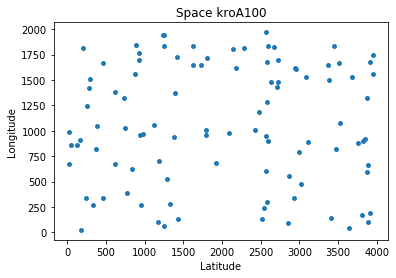

In [3]:
# Get Space
space = np.array(TSP['node_coord_section'])

# Plot nodes
plt.scatter(space[:, 0], space[:, 1], s = 15)

# Plot properties
plt.title('Space {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()

Then we call the algorithm as it follows. By default our algorithm parameters will be: 

```python
    {numpy.ndarray} space           -- The space
    {int} iterations {50}           -- Number of iterations (Ending condition)
    {int} colony {50}               -- Number of ants in the colony
    {float} alpha {1.0}             -- Alpha algorithm parameter, more or less weight to a selected distance
    {float} beta {1.0}              -- Beta algorithm parameter, more or less weight to a selected distance
    {float} del_tau {1.0}           -- Delta Tau algorithm parameter, pheromones releasing rate
    {float} rho {0.5}               -- Rho algorithm parameter, pheromones evaporation rate
```

And they can be changed passing them to the function. In this case we will run it as default. 

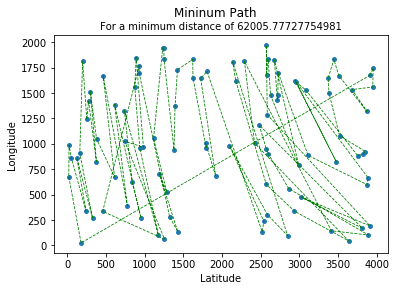

In [4]:
# Run ACO
min_path, min_distance = runAcoTsp(space)

# Plot path
plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.suptitle('Mininum Path')
plt.title('For a minimum distance of {}'.format(min_distance), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()

Finally, to watch the algorith initial points randomness, we can perform it to get an average

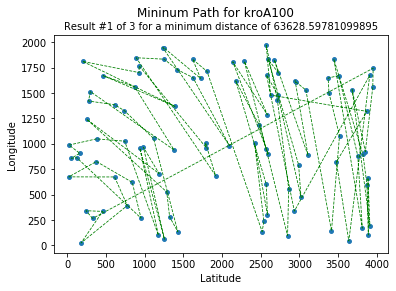

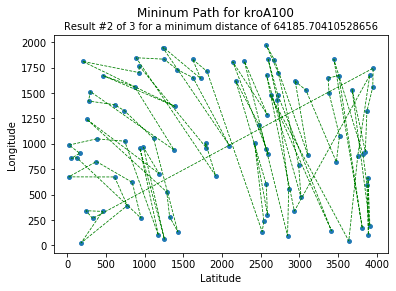

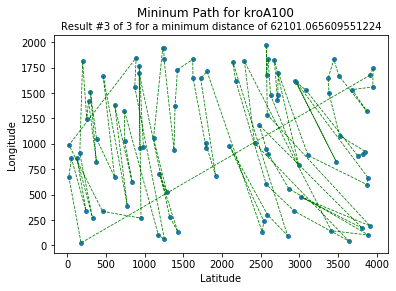

In [5]:
# Vars
n = 3 
average = 0 

# Repeat
for i in range(n):
    # Perform
    min_path, min_distance = runAcoTsp(space)
    average += min_distance 
    
    # Plot path
    plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
    plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

    # Plot properties
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    
# Show Average
print('Min Distance Average for the last {} results is {}'.format(n, average/n))